# Data Analysis and Datamart Preparation for Financial Banking data

In [95]:
#Import the library:
import numpy as np               # Arrary
import pandas as pd              # DataFrame
import matplotlib.pyplot as plt  # Plotting
import matplotlib.patches as mpatches #plotting

In [5]:
# Import all the files of banking data
client = pd.read_csv('./data_project/client.asc', sep=';')
account = pd.read_csv('./data_project/account.asc', sep=';')
card = pd.read_csv('./data_project/card.asc', sep=';')
disp = pd.read_csv('./data_project/disp.asc', sep=';')
order = pd.read_csv('./data_project/order.asc', sep=';')
trans = pd.read_csv('./data_project/trans.asc', sep=';', low_memory=False)
loan = pd.read_csv('./data_project/loan.asc', sep=';')
district = pd.read_csv('./data_project/district.asc', sep=';')


In [6]:
#Viewing the client table
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [7]:
#Viewing the account table
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [8]:
#Viewing the creditcard table
card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [9]:
#Viewing the disposition table
disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [10]:
#Viewing the permanent order table
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [11]:
#Viewing the transaction table
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [12]:
#Viewing the loan details from loan table
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [13]:
#Viewing the district table with demographic details
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


### Manipulating the client table

In [14]:
#Manipulating the Client data
#Generating the birth day and year from the birth date
client['birth_year'] = client['birth_number'].transform(lambda bn: int('19' + str(bn)[:2]))
client['birth_day'] = client['birth_number'].astype(str).str[-2:].astype(int)
client.head()

,client_id,birth_number,district_id,birth_year,birth_day
0,1,706213,18,1970,13
1,2,450204,1,1945,4
2,3,406009,1,1940,9
3,4,561201,5,1956,1
4,5,605703,5,1960,3


In [15]:
# Function to extract birth month and gender from the client table inorder to calculate age
def to_month_gender(birth_number):
    
    s = str(birth_number)
    birth_month = int(s[2:4])
    
    if birth_month > 50:
        gender = "F"
        birth_month = birth_month - 50
    else:
        gender = 'M'
        
    return pd.Series({'birth_month':birth_month, 'gender':gender})

client[['birth_month', 'gender']] = client['birth_number'].apply(to_month_gender)
client.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender
0,1,706213,18,1970,13,12,F
1,2,450204,1,1945,4,2,M
2,3,406009,1,1940,9,10,F
3,4,561201,5,1956,1,12,M
4,5,605703,5,1960,3,7,F


In [16]:
# Calculate Age of the client
client['age'] = 1999 - client['birth_year']
client.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age
0,1,706213,18,1970,13,12,F,29
1,2,450204,1,1945,4,2,M,54
2,3,406009,1,1940,9,10,F,59
3,4,561201,5,1956,1,12,M,43
4,5,605703,5,1960,3,7,F,39


### Manipulating the account table

In [17]:
#Manipulating the account table 
#Manipulating account table to find the account opening year

# Find the client account openning date
account['account_year'] = '19' + account['date'].astype(str).str[:2]

# Convert back to number
account['account_year'] = account['account_year'].astype(int)
#Month of account opening
account['account_Month'] = account['date'].astype(str).str[2:4].astype(int)

#Viewing the account table after manipulation
account.head()

,account_id,district_id,frequency,date,account_year,account_Month
0,576,55,POPLATEK MESICNE,930101,1993,1
1,3818,74,POPLATEK MESICNE,930101,1993,1
2,704,55,POPLATEK MESICNE,930101,1993,1
3,2378,16,POPLATEK MESICNE,930101,1993,1
4,2632,24,POPLATEK MESICNE,930102,1993,1


### Manipulating the Card table

In [18]:
#Manipulating the card table to get the year since the client had the credit card
card['card_year'] = '19' + card['issued'].astype(str).str[:2]
card['card_year'] = card['card_year'].astype(int)

In [19]:
#Merging account table and disposition table, and then merging the same with card table
account_disp = pd.merge(disp,account,on='account_id',how='left')
card_acc = pd.merge(card,account_disp,on='disp_id',how='left')

In [20]:
#Calculating a new variable for the year they got the credit card from the account opened year
card_acc['Years_creditcard'] = card_acc['card_year'] - card_acc['account_year']

In [21]:
#Viewing the table card_acc after creating the new variable
card_acc.head()

,card_id,disp_id,type_x,issued,card_year,client_id,account_id,type_y,district_id,frequency,date,account_year,account_Month,Years_creditcard
0,1005,9285,classic,931107 00:00:00,1993,9593,7753,OWNER,74,POPLATEK MESICNE,930208,1993,2,0
1,104,588,classic,940119 00:00:00,1994,588,489,OWNER,16,POPLATEK MESICNE,930517,1993,5,1
2,747,4915,classic,940205 00:00:00,1994,4915,4078,OWNER,40,POPLATEK MESICNE,930130,1993,1,1
3,70,439,classic,940208 00:00:00,1994,439,361,OWNER,51,POPLATEK MESICNE,930227,1993,2,1
4,577,3687,classic,940215 00:00:00,1994,3687,3050,OWNER,60,POPLATEK MESICNE,930508,1993,5,1


In [22]:
#Extracting only the columns client_id and years
card_year = card_acc.loc[:,['client_id','Years_creditcard']]

In [23]:
#Viewing the creditcard table with the two columns
card_year.head()

,client_id,Years_creditcard
0,9593,0
1,588,1
2,4915,1
3,439,1
4,3687,1


In [24]:
#Pivoting the cards table to subset the clients holding different type of credit cards
cards_pv = card_acc.pivot_table(index='client_id', columns='type_x', values='card_id', aggfunc='count').fillna(0)
cards_pv.head()

type_x,classic,gold,junior
client_id,,,
9,0.0,1.0,0.0
19,1.0,0.0,0.0
41,0.0,1.0,0.0
42,1.0,0.0,0.0
51,0.0,0.0,1.0


### Manipulating the transaction table and merging the variables with client table

In [25]:
#Manipulating the transaction table
#Splitting the date into date , year and month in transaction table
trans['trans_year'] = '19' + trans['date'].astype(str).str[:2]
trans['trans_year'] = trans['trans_year'].astype(int)
trans['trans_month'] = trans['date'].astype(str).str[2:4].astype(int)
trans['trans_day'] = trans['date'].astype(str).str[4:6].astype(int)
trans.tail()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,trans_year,trans_month,trans_day
1056315,3626622,2906,981231,PRIJEM,NaN,62.3,13729.4,UROK,NaN,NaN,1998,12,31
1056316,3627616,2935,981231,PRIJEM,NaN,81.3,19544.9,UROK,NaN,NaN,1998,12,31
1056317,3625403,2869,981231,PRIJEM,NaN,60.2,14638.2,UROK,NaN,NaN,1998,12,31
1056318,3626683,2907,981231,PRIJEM,NaN,107.5,23453.0,UROK,NaN,NaN,1998,12,31
1056319,3626540,2902,981231,PRIJEM,NaN,164.1,41642.9,UROK,NaN,NaN,1998,12,31


In [26]:
#Finding if the transaction was done on weekday or weekend by creating a new column for the same
import datetime

def is_weekend(trans):
    
    wd = datetime.datetime(trans['trans_year'], trans['trans_month'], trans['trans_day']).weekday()
    
    if (wd == 5) | (wd == 6):  # In the weekend
        return 'Weekend'
    else:
        return 'Weekday'

trans['is_weekend'] = trans.apply(is_weekend, axis=1)

In [27]:
#Viewing the Transaction table after creating the new column
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,trans_year,trans_month,trans_day,is_weekend
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,1993,1,1,Weekday
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1993,1,1,Weekday
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1993,1,1,Weekday
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN,1993,1,1,Weekday
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN,1993,1,2,Weekend


In [28]:
#Checking the unique operations
trans.operation.unique()

array(['VKLAD', 'PREVOD Z UCTU', 'VYBER', nan, 'PREVOD NA UCET',
       'VYBER KARTOU'], dtype=object)

In [29]:
#merging the disp table with the transaction table for getting the client id
trans_client = pd.merge(trans,disp,on='account_id',how='left')
trans_client.head()

,trans_id,account_id,date,type_x,operation,amount,balance,k_symbol,bank,account,trans_year,trans_month,trans_day,is_weekend,disp_id,client_id,type_y
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,1993,1,1,Weekday,2873,2873,OWNER
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1993,1,1,Weekday,692,692,OWNER
2,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1993,1,1,Weekday,693,693,DISPONENT
3,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1993,1,1,Weekday,844,844,OWNER
4,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1993,1,1,Weekday,845,845,DISPONENT


In [30]:
#Renaming some columns in the client table
trans_client = trans_client.rename(columns = {'type_y':'account_type'})
trans_client = trans_client.rename(columns = {'type_x':'transaction_type'})

In [31]:
#Viewing the table after renaming
trans_client.head()

,trans_id,account_id,date,transaction_type,operation,amount,balance,k_symbol,bank,account,trans_year,trans_month,trans_day,is_weekend,disp_id,client_id,account_type
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,1993,1,1,Weekday,2873,2873,OWNER
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1993,1,1,Weekday,692,692,OWNER
2,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1993,1,1,Weekday,693,693,DISPONENT
3,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1993,1,1,Weekday,844,844,OWNER
4,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1993,1,1,Weekday,845,845,DISPONENT


In [32]:
#Finding the aggregation or count of transaction for weekday and weekend per client as seperate variables
weekcount = trans_client.pivot_table(index='client_id', columns='is_weekend', values='trans_id', aggfunc='count').fillna(0)
weekcount.head()

is_weekend,Weekday,Weekend
client_id,,
1,167,72
2,349,129
3,349,129
4,81,36
5,81,36


In [33]:
#Staring to form the basetable with first merging the client table with weekend and weekday variables from transaction columns
client_overall = pd.merge(client,weekcount,on='client_id',how='left')
client_overall.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age,Weekday,Weekend
0,1,706213,18,1970,13,12,F,29,167,72
1,2,450204,1,1945,4,2,M,54,349,129
2,3,406009,1,1940,9,10,F,59,349,129
3,4,561201,5,1956,1,12,M,43,81,36
4,5,605703,5,1960,3,7,F,39,81,36


In [34]:
#Replacing the values in transaction type to credit and withdrawal for easier naming convention
trans_client.transaction_type = trans_client.transaction_type.replace({"PRIJEM": "Credit",
                                                   "VYDAJ": "Withdrawal","VYBER":"Withdrawal"})

In [35]:
#Viewing the table after renaming
trans_client.head()

,trans_id,account_id,date,transaction_type,operation,amount,balance,k_symbol,bank,account,trans_year,trans_month,trans_day,is_weekend,disp_id,client_id,account_type
0,695247,2378,930101,Credit,VKLAD,700.0,700.0,NaN,NaN,NaN,1993,1,1,Weekday,2873,2873,OWNER
1,171812,576,930101,Credit,VKLAD,900.0,900.0,NaN,NaN,NaN,1993,1,1,Weekday,692,692,OWNER
2,171812,576,930101,Credit,VKLAD,900.0,900.0,NaN,NaN,NaN,1993,1,1,Weekday,693,693,DISPONENT
3,207264,704,930101,Credit,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1993,1,1,Weekday,844,844,OWNER
4,207264,704,930101,Credit,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1993,1,1,Weekday,845,845,DISPONENT


In [36]:
#Creating two new variables for Credit and withdrwal amounts by pivoting by amount.
credit_withdrw = trans_client.pivot_table(index='client_id', 
                                          columns='transaction_type', values='amount', aggfunc='mean').fillna(0)

In [37]:
#The pivoted values are then merged with the client table which already contains some transaction variables
client_overall = pd.merge(client_overall,credit_withdrw,on='client_id',how='left')

In [38]:
#Viewing the table after merging
client_overall.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age,Weekday,Weekend,Credit,Withdrawal
0,1,706213,18,1970,13,12,F,29,167,72,1905.102941,1320.102190
1,2,450204,1,1945,4,2,M,54,349,129,10506.930921,4768.177301
2,3,406009,1,1940,9,10,F,59,349,129,10506.930921,4768.177301
3,4,561201,5,1956,1,12,M,43,81,36,3762.152174,1717.785915
4,5,605703,5,1960,3,7,F,39,81,36,3762.152174,1717.785915


In [39]:
#Manipulating the transaction table again to calulate the count of the different operations of transaion per client
operation = trans_client.pivot_table(index='client_id', columns='operation', values='trans_id', aggfunc='count').fillna(0)
operation.head()

operation,PREVOD NA UCET,PREVOD Z UCTU,VKLAD,VYBER,VYBER KARTOU
client_id,,,,,
1,40.0,45.0,12.0,97.0,0.0
2,89.0,70.0,12.0,237.0,0.0
3,89.0,70.0,12.0,237.0,0.0
4,39.0,0.0,28.0,32.0,0.0
5,39.0,0.0,28.0,32.0,0.0


In [40]:
#From the operation values generated only the first two columns which correspond to transaction done to another bank(reminance/collection)
operation = operation.iloc[:,0:2]

In [41]:
#Merge the operation values from transaction table into the client table along with other newly added columns
client_overall = pd.merge(client_overall,operation,on='client_id',how='left')

client_overall.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age,Weekday,Weekend,Credit,Withdrawal,PREVOD NA UCET,PREVOD Z UCTU
0,1,706213,18,1970,13,12,F,29,167,72,1905.102941,1320.102190,40.0,45.0
1,2,450204,1,1945,4,2,M,54,349,129,10506.930921,4768.177301,89.0,70.0
2,3,406009,1,1940,9,10,F,59,349,129,10506.930921,4768.177301,89.0,70.0
3,4,561201,5,1956,1,12,M,43,81,36,3762.152174,1717.785915,39.0,0.0
4,5,605703,5,1960,3,7,F,39,81,36,3762.152174,1717.785915,39.0,0.0


In [42]:
#Pivoting the transaction table to find the count of different mode of transactions done based on column K_symbol for every client
transchar = trans_client.pivot_table(index='client_id', columns='k_symbol', values='trans_id', aggfunc='count').fillna(0)
transchar.head()

k_symbol,,DUCHOD,POJISTNE,SANKC. UROK,SIPO,SLUZBY,UROK,UVER
client_id,,,,,,,,
1,0.0,0.0,0.0,0.0,40.0,40.0,45.0,0.0
2,0.0,0.0,0.0,0.0,65.0,65.0,70.0,24.0
3,0.0,0.0,0.0,0.0,65.0,65.0,70.0,24.0
4,13.0,0.0,13.0,0.0,13.0,13.0,18.0,0.0
5,13.0,0.0,13.0,0.0,13.0,13.0,18.0,0.0


In [43]:
#Merging the client table with the newly calculated transaction values from transaction table
client_overall = pd.merge(client_overall,transchar,on='client_id',how='left')
client_overall.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age,Weekday,Weekend,...,PREVOD NA UCET,PREVOD Z UCTU,,DUCHOD,POJISTNE,SANKC. UROK,SIPO,SLUZBY,UROK,UVER
0,1,706213,18,1970,13,12,F,29,167,72,...,40.0,45.0,0.0,0.0,0.0,0.0,40.0,40.0,45.0,0.0
1,2,450204,1,1945,4,2,M,54,349,129,...,89.0,70.0,0.0,0.0,0.0,0.0,65.0,65.0,70.0,24.0
2,3,406009,1,1940,9,10,F,59,349,129,...,89.0,70.0,0.0,0.0,0.0,0.0,65.0,65.0,70.0,24.0
3,4,561201,5,1956,1,12,M,43,81,36,...,39.0,0.0,13.0,0.0,13.0,0.0,13.0,13.0,18.0,0.0
4,5,605703,5,1960,3,7,F,39,81,36,...,39.0,0.0,13.0,0.0,13.0,0.0,13.0,13.0,18.0,0.0


In [44]:
#Calculating the transaction amount for every month per client from trans_client table
avg_month = trans_client.pivot_table(index='client_id', columns='trans_month',values='amount',aggfunc='mean').fillna(0)
avg_month.head()

trans_month,1,2,3,4,5,6,7,8,9,10,11,12
client_id,,,,,,,,,,,,
1,996.200000,1300.652941,1576.712500,2119.005556,1567.161111,1378.811111,1734.833333,1692.704545,1708.320000,1634.294737,1526.642857,1906.676190
2,5562.880769,5526.436364,6546.708824,6501.494595,6744.630000,9461.027778,6744.692308,6368.527907,6449.966667,6132.345946,5688.688095,7653.291304
3,5562.880769,5526.436364,6546.708824,6501.494595,6744.630000,9461.027778,6744.692308,6368.527907,6449.966667,6132.345946,5688.688095,7653.291304
4,2270.484615,1824.928571,2600.771429,2092.412500,1917.000000,2967.885714,2216.680000,2612.254545,2458.040000,2870.880000,2861.350000,3004.340000
5,2270.484615,1824.928571,2600.771429,2092.412500,1917.000000,2967.885714,2216.680000,2612.254545,2458.040000,2870.880000,2861.350000,3004.340000


In [45]:
#Calculating the average transaction per month per client
avg_month['Avg_trans_permonth'] = avg_month.mean(axis=1)
avg_month.head()

trans_month,1,2,3,4,5,6,7,8,9,10,11,12,Avg_trans_permonth
client_id,,,,,,,,,,,,,
1,996.200000,1300.652941,1576.712500,2119.005556,1567.161111,1378.811111,1734.833333,1692.704545,1708.320000,1634.294737,1526.642857,1906.676190,1595.167907
2,5562.880769,5526.436364,6546.708824,6501.494595,6744.630000,9461.027778,6744.692308,6368.527907,6449.966667,6132.345946,5688.688095,7653.291304,6615.057546
3,5562.880769,5526.436364,6546.708824,6501.494595,6744.630000,9461.027778,6744.692308,6368.527907,6449.966667,6132.345946,5688.688095,7653.291304,6615.057546
4,2270.484615,1824.928571,2600.771429,2092.412500,1917.000000,2967.885714,2216.680000,2612.254545,2458.040000,2870.880000,2861.350000,3004.340000,2474.752281
5,2270.484615,1824.928571,2600.771429,2092.412500,1917.000000,2967.885714,2216.680000,2612.254545,2458.040000,2870.880000,2861.350000,3004.340000,2474.752281


In [46]:
#Extracting only the average transper month column
avg_month = avg_month.iloc[:,12]

In [47]:
#Converting series to a dataframe
avg_month = avg_month.to_frame()

In [48]:
#Merging the avg amount per month with the client table
client_overall = pd.merge(client_overall,avg_month,on='client_id',how='left')

In [49]:
#Viewing the client table after merging
client_overall.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age,Weekday,Weekend,...,PREVOD Z UCTU,,DUCHOD,POJISTNE,SANKC. UROK,SIPO,SLUZBY,UROK,UVER,Avg_trans_permonth
0,1,706213,18,1970,13,12,F,29,167,72,...,45.0,0.0,0.0,0.0,0.0,40.0,40.0,45.0,0.0,1595.167907
1,2,450204,1,1945,4,2,M,54,349,129,...,70.0,0.0,0.0,0.0,0.0,65.0,65.0,70.0,24.0,6615.057546
2,3,406009,1,1940,9,10,F,59,349,129,...,70.0,0.0,0.0,0.0,0.0,65.0,65.0,70.0,24.0,6615.057546
3,4,561201,5,1956,1,12,M,43,81,36,...,0.0,13.0,0.0,13.0,0.0,13.0,13.0,18.0,0.0,2474.752281
4,5,605703,5,1960,3,7,F,39,81,36,...,0.0,13.0,0.0,13.0,0.0,13.0,13.0,18.0,0.0,2474.752281


In [50]:
#Finding the transaction date column by merging the year,month and day values in transaction table
trans_client['trans_date'] = trans_client.apply(lambda x: datetime.date(x['trans_year'],
                                                                        x['trans_month'], x['trans_day']), axis=1)

In [51]:
#Dropping the previous date column in transaction table which did not have a proper format
trans_client = trans_client.drop("date",axis=1)

In [52]:
#Finding the balance amount from the maximum transaction date per client

sorted = trans_client.sort_values(by='trans_date')

result = sorted.drop_duplicates('client_id', keep='last')

In [53]:
result.head()

,trans_id,account_id,transaction_type,operation,amount,balance,k_symbol,bank,account,trans_year,trans_month,trans_day,is_weekend,disp_id,client_id,account_type,trans_date
443236,234606,799,Withdrawal,VYBER,2300.0,9348.3,NaN,NaN,NaN,1996,8,25,Weekend,958,958,DISPONENT,1996-08-25
443235,234606,799,Withdrawal,VYBER,2300.0,9348.3,NaN,NaN,NaN,1996,8,25,Weekend,957,957,OWNER,1996-08-25
454337,504192,1720,Withdrawal,VYBER,500.0,11400.0,NaN,NaN,NaN,1996,9,7,Weekend,2086,2086,OWNER,1996-09-07
519644,596180,2029,Withdrawal,VYBER,300.0,8900.0,NaN,NaN,NaN,1996,12,9,Weekday,2464,2464,OWNER,1996-12-09
601283,137171,459,Withdrawal,VYBER,700.0,8100.0,NaN,NaN,NaN,1997,3,1,Weekend,551,551,OWNER,1997-03-01


In [54]:
#Extracting only the balance and clientid columns
result = result.loc[:,['balance','client_id']]


In [55]:
#Merging this value with the client table which completes the addition of all transaction related variables per client
client_overall_trans = pd.merge(client_overall,result,on='client_id',how='left')

In [56]:
#Viewing the merged client and transaction variables
client_overall_trans.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age,Weekday,Weekend,...,,DUCHOD,POJISTNE,SANKC. UROK,SIPO,SLUZBY,UROK,UVER,Avg_trans_permonth,balance
0,1,706213,18,1970,13,12,F,29,167,72,...,0.0,0.0,0.0,0.0,40.0,40.0,45.0,0.0,1595.167907,13466.5
1,2,450204,1,1945,4,2,M,54,349,129,...,0.0,0.0,0.0,0.0,65.0,65.0,70.0,24.0,6615.057546,42628.1
2,3,406009,1,1940,9,10,F,59,349,129,...,0.0,0.0,0.0,0.0,65.0,65.0,70.0,24.0,6615.057546,42628.1
3,4,561201,5,1956,1,12,M,43,81,36,...,13.0,0.0,13.0,0.0,13.0,13.0,18.0,0.0,2474.752281,51096.1
4,5,605703,5,1960,3,7,F,39,81,36,...,13.0,0.0,13.0,0.0,13.0,13.0,18.0,0.0,2474.752281,51096.1


In [57]:
#Dropping some columns from the overall merged table which are not needed

client_overall_trans = client_overall_trans.drop(['birth_number','district_id','birth_year','birth_day','birth_month'],axis=1)

In [58]:
#rename the columns of the client_overall_trans table to give meaningful insights

client_overall_trans = client_overall_trans.rename(columns = {'PREVOD NA UCET':'collect_otherbank'})
client_overall_trans = client_overall_trans.rename(columns = {'PREVOD Z UCTU':'remit_otherbank'})
client_overall_trans = client_overall_trans.rename(columns = {'DUCHOD':'oldage_pension'})
client_overall_trans = client_overall_trans.rename(columns = {'POJISTNE':'insurance_payment'})
client_overall_trans = client_overall_trans.rename(columns = {'SANKC. UROK':'negative_payment'})
client_overall_trans = client_overall_trans.rename(columns = {'SIPO':'household'})
client_overall_trans = client_overall_trans.rename(columns = {'SLUZBY':'payment_statement'})
client_overall_trans = client_overall_trans.rename(columns = {'UROK':'credit_interest'})
client_overall_trans = client_overall_trans.rename(columns = {'UVER':'loan_payment'})
client_overall_trans = client_overall_trans.rename(columns = {' ' : 'others'})
client_overall_trans = client_overall_trans.rename(columns = {'Credit':'Credit_amount'})
client_overall_trans = client_overall_trans.rename(columns = {'Withdrawal':'Withdrawal_amount'})

In [59]:
#Viewing the table after renaming
client_overall_trans.head()

,client_id,gender,age,Weekday,Weekend,Credit_amount,Withdrawal_amount,collect_otherbank,remit_otherbank,others,oldage_pension,insurance_payment,negative_payment,household,payment_statement,credit_interest,loan_payment,Avg_trans_permonth,balance
0,1,F,29,167,72,1905.102941,1320.102190,40.0,45.0,0.0,0.0,0.0,0.0,40.0,40.0,45.0,0.0,1595.167907,13466.5
1,2,M,54,349,129,10506.930921,4768.177301,89.0,70.0,0.0,0.0,0.0,0.0,65.0,65.0,70.0,24.0,6615.057546,42628.1
2,3,F,59,349,129,10506.930921,4768.177301,89.0,70.0,0.0,0.0,0.0,0.0,65.0,65.0,70.0,24.0,6615.057546,42628.1
3,4,M,43,81,36,3762.152174,1717.785915,39.0,0.0,13.0,0.0,13.0,0.0,13.0,13.0,18.0,0.0,2474.752281,51096.1
4,5,F,39,81,36,3762.152174,1717.785915,39.0,0.0,13.0,0.0,13.0,0.0,13.0,13.0,18.0,0.0,2474.752281,51096.1


### Merging the client , transaction and manipulated account and card table variables

In [60]:
#Merging the client and transcation variable table with the credit card details per client
client_overall1 = pd.merge(client_overall_trans,card_year,on='client_id',how='left').fillna(0)

In [61]:
#Merging the client and transcation variable table with the credit card details per client
client_overall1 = pd.merge(client_overall1,cards_pv,on='client_id',how='left').fillna(0)

In [62]:
#Viewing the table after merging
client_overall1.head()

,client_id,gender,age,Weekday,Weekend,Credit_amount,Withdrawal_amount,collect_otherbank,remit_otherbank,others,...,household,payment_statement,credit_interest,loan_payment,Avg_trans_permonth,balance,Years_creditcard,classic,gold,junior
0,1,F,29,167,72,1905.102941,1320.102190,40.0,45.0,0.0,...,40.0,40.0,45.0,0.0,1595.167907,13466.5,0.0,0.0,0.0,0.0
1,2,M,54,349,129,10506.930921,4768.177301,89.0,70.0,0.0,...,65.0,65.0,70.0,24.0,6615.057546,42628.1,0.0,0.0,0.0,0.0
2,3,F,59,349,129,10506.930921,4768.177301,89.0,70.0,0.0,...,65.0,65.0,70.0,24.0,6615.057546,42628.1,0.0,0.0,0.0,0.0
3,4,M,43,81,36,3762.152174,1717.785915,39.0,0.0,13.0,...,13.0,13.0,18.0,0.0,2474.752281,51096.1,0.0,0.0,0.0,0.0
4,5,F,39,81,36,3762.152174,1717.785915,39.0,0.0,13.0,...,13.0,13.0,18.0,0.0,2474.752281,51096.1,0.0,0.0,0.0,0.0


In [63]:
#Pivoting the account and disp merged table by frequency to get the count of different account statment issuance
account_new = account_disp.pivot_table(index='client_id',columns='frequency',values='account_id',aggfunc='count').fillna(0)
account_new.head()

frequency,POPLATEK MESICNE,POPLATEK PO OBRATU,POPLATEK TYDNE
client_id,,,
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0


In [64]:
#Merging this account related variables with the already merged client ,transaction and card details
client_overall2 = pd.merge(client_overall1,account_new,on='client_id',how='left')

In [65]:
#Extracting the account opened year from account table
account_disp1 = account_disp.loc[:,['client_id','account_year']]

In [66]:
#Merging the account opened year with the other variables in client overall table
client_overall2 = pd.merge(client_overall2,account_disp1,how='left')

In [67]:
#Viewing the table after merging
client_overall2.head()

,client_id,gender,age,Weekday,Weekend,Credit_amount,Withdrawal_amount,collect_otherbank,remit_otherbank,others,...,Avg_trans_permonth,balance,Years_creditcard,classic,gold,junior,POPLATEK MESICNE,POPLATEK PO OBRATU,POPLATEK TYDNE,account_year
0,1,F,29,167,72,1905.102941,1320.102190,40.0,45.0,0.0,...,1595.167907,13466.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1995
1,2,M,54,349,129,10506.930921,4768.177301,89.0,70.0,0.0,...,6615.057546,42628.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1993
2,3,F,59,349,129,10506.930921,4768.177301,89.0,70.0,0.0,...,6615.057546,42628.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1993
3,4,M,43,81,36,3762.152174,1717.785915,39.0,0.0,13.0,...,2474.752281,51096.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1997
4,5,F,39,81,36,3762.152174,1717.785915,39.0,0.0,13.0,...,2474.752281,51096.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1997


### Manipulating the disposition, loan and order table

In [68]:
#pivoting the disposition table to get the distinction of disposition and owner accounts
disp_new = disp.pivot_table(index='client_id',columns='type',values='account_id',aggfunc='count').fillna(0)
disp_new.head()

type,DISPONENT,OWNER
client_id,,
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
5,1.0,0.0


In [69]:
#Merging the different owner and disposition variables with the overall client table
client_overall3 = pd.merge(client_overall2,disp_new,on='client_id',how='left')

In [70]:
#Viewing the table after merging
client_overall3.head()

,client_id,gender,age,Weekday,Weekend,Credit_amount,Withdrawal_amount,collect_otherbank,remit_otherbank,others,...,Years_creditcard,classic,gold,junior,POPLATEK MESICNE,POPLATEK PO OBRATU,POPLATEK TYDNE,account_year,DISPONENT,OWNER
0,1,F,29,167,72,1905.102941,1320.102190,40.0,45.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1995,0.0,1.0
1,2,M,54,349,129,10506.930921,4768.177301,89.0,70.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1993,0.0,1.0
2,3,F,59,349,129,10506.930921,4768.177301,89.0,70.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1993,1.0,0.0
3,4,M,43,81,36,3762.152174,1717.785915,39.0,0.0,13.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1997,0.0,1.0
4,5,F,39,81,36,3762.152174,1717.785915,39.0,0.0,13.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1997,1.0,0.0


In [71]:
#importing the tables created with new variables for the tables loan,demographic and permanent order details.The details for these tables creation are mentioned in a seperate code and uploaded in github
dist_client = pd.read_csv('./data_project/clientdist.csv', sep='\t')
loan_client = pd.read_csv('./data_project/clientloans.csv', sep='\t')
order_client = pd.read_csv('./data_project/clientdepo.csv', sep='\t')

In [72]:
#dropping the additional unwanted column
dist_client = dist_client.drop('Unnamed: 0',axis = 1)
#Viewing the District demographic details table
dist_client.head()

,client_id,Region,Region_AvgUnemploymentRate_96,Region_AvgSalary,Region_AvgCrimeRate_96
0,1,south Bohemia,2.813750,8831.50,2271.625000
1,2,Prague,0.430000,12541.00,99107.000000
2,3,Prague,0.430000,12541.00,99107.000000
3,4,central Bohemia,2.878333,9357.25,3620.583333
4,5,central Bohemia,2.878333,9357.25,3620.583333


In [73]:
#Dropping unwanted column in loan table
loan_client = loan_client.drop('Unnamed: 0',axis = 1)

In [74]:
#Renaming the columns in manipulated loan table
loan_client = loan_client.rename(columns = {'amount':'loan_amount'})
loan_client = loan_client.rename(columns = {'duration':'loan_duration'})
loan_client = loan_client.rename(columns = {'status_A':'Loan_complete_paid'})
loan_client = loan_client.rename(columns = {'status_B':'Loan_complete_unpaid'})
loan_client = loan_client.rename(columns = {'status_C':'Loan_Contract_running'})
loan_client = loan_client.rename(columns = {'status_D':'Loan_client_debt'})
loan_client.head()

,client_id,loan_amount,loan_duration,Loan_complete_paid,Loan_complete_unpaid,Loan_Contract_running,Loan_client_debt
0,1,0.0,0.0,0.0,0.0,0.0,0.0
1,2,80952.0,24.0,1.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
#Dropping unwanted columns from the orders table
order_client = order_client.drop(["Unnamed: 0","Avg_Deposits"],axis=1)


In [76]:
#Renaming the columns from order table
order_client = order_client.rename(columns = {'DepositsFreq':'Debit_Freq'})
order_client.head()

,client_id,Debit_Freq
0,1,1.0
1,2,2.0
2,3,2.0
3,4,3.0
4,5,3.0


### Merging the loan,disposition and order tables with the overall client table

In [77]:
#Merging the modified loan table with the overall client table with all the newly created variables across all tables
client_overall4 = pd.merge(client_overall3,loan_client,on='client_id',how='left')

In [78]:
#Merging the modified permanent order table with the overall client table with all the newly created variables across all tables
client_overall5 = pd.merge(client_overall4,order_client,on='client_id',how='left')

In [79]:
#Merging the modified district demogrpahic table with the overal client table with all the newly created variables 
basetable_final = pd.merge(client_overall5,dist_client,on='client_id',how='left')

In [80]:
#Viewing the final basetable with all the variables
basetable_final.head()

,client_id,gender,age,Weekday,Weekend,Credit_amount,Withdrawal_amount,collect_otherbank,remit_otherbank,others,...,loan_duration,Loan_complete_paid,Loan_complete_unpaid,Loan_Contract_running,Loan_client_debt,Debit_Freq,Region,Region_AvgUnemploymentRate_96,Region_AvgSalary,Region_AvgCrimeRate_96
0,1,F,29,167,72,1905.102941,1320.102190,40.0,45.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,south Bohemia,2.813750,8831.50,2271.625000
1,2,M,54,349,129,10506.930921,4768.177301,89.0,70.0,0.0,...,24.0,1.0,0.0,0.0,0.0,2.0,Prague,0.430000,12541.00,99107.000000
2,3,F,59,349,129,10506.930921,4768.177301,89.0,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,Prague,0.430000,12541.00,99107.000000
3,4,M,43,81,36,3762.152174,1717.785915,39.0,0.0,13.0,...,0.0,0.0,0.0,0.0,0.0,3.0,central Bohemia,2.878333,9357.25,3620.583333
4,5,F,39,81,36,3762.152174,1717.785915,39.0,0.0,13.0,...,0.0,0.0,0.0,0.0,0.0,3.0,central Bohemia,2.878333,9357.25,3620.583333


In [81]:
#Viewing the columns in the basetable
basetable_final.columns

Index(['client_id', 'gender', 'age', 'Weekday', 'Weekend', 'Credit_amount',
       'Withdrawal_amount', 'collect_otherbank', 'remit_otherbank', 'others',
       'oldage_pension', 'insurance_payment', 'negative_payment', 'household',
       'payment_statement', 'credit_interest', 'loan_payment',
       'Avg_trans_permonth', 'balance', 'Years_creditcard', 'classic', 'gold',
       'junior', 'POPLATEK MESICNE', 'POPLATEK PO OBRATU', 'POPLATEK TYDNE',
       'account_year', 'DISPONENT', 'OWNER', 'loan_amount', 'loan_duration',
       'Loan_complete_paid', 'Loan_complete_unpaid', 'Loan_Contract_running',
       'Loan_client_debt', 'Debit_Freq', 'Region',
       'Region_AvgUnemploymentRate_96', 'Region_AvgSalary',
       'Region_AvgCrimeRate_96'],
      dtype='object')

In [82]:
#Renaming the columns in the final datamart/basetable
basetable_final = basetable_final.rename(columns = {'POPLATEK MESICNE':'statement_monthly'})
basetable_final = basetable_final.rename(columns = {'POPLATEK PO OBRATU':'statement_transaction'})
basetable_final = basetable_final.rename(columns = {'POPLATEK TYDNE':'statement_weekly'})
basetable_final = basetable_final.rename(columns = {'DISPONENT':'Disponent_account'})
basetable_final = basetable_final.rename(columns = {'OWNER':'Owner_account'})
basetable_final = basetable_final.rename(columns = {'balance':'Balance_amount'})
basetable_final = basetable_final.rename(columns = {'Debit_Freq':'AutoDebit_Freq'})
basetable_final = basetable_final.rename(columns = {'Weekday':'Weekday_Transaction'})
basetable_final = basetable_final.rename(columns = {'Weekend':'Weekend_Transaction'})

In [83]:
#Viewing the final columns
basetable_final.columns


Index(['client_id', 'gender', 'age', 'Weekday_Transaction',
       'Weekend_Transaction', 'Credit_amount', 'Withdrawal_amount',
       'collect_otherbank', 'remit_otherbank', 'others', 'oldage_pension',
       'insurance_payment', 'negative_payment', 'household',
       'payment_statement', 'credit_interest', 'loan_payment',
       'Avg_trans_permonth', 'Balance_amount', 'Years_creditcard', 'classic',
       'gold', 'junior', 'statement_monthly', 'statement_transaction',
       'statement_weekly', 'account_year', 'Disponent_account',
       'Owner_account', 'loan_amount', 'loan_duration', 'Loan_complete_paid',
       'Loan_complete_unpaid', 'Loan_Contract_running', 'Loan_client_debt',
       'AutoDebit_Freq', 'Region', 'Region_AvgUnemploymentRate_96',
       'Region_AvgSalary', 'Region_AvgCrimeRate_96'],
      dtype='object')

In [84]:
#Viewing the overall table
basetable_final.head()

,client_id,gender,age,Weekday_Transaction,Weekend_Transaction,Credit_amount,Withdrawal_amount,collect_otherbank,remit_otherbank,others,...,loan_duration,Loan_complete_paid,Loan_complete_unpaid,Loan_Contract_running,Loan_client_debt,AutoDebit_Freq,Region,Region_AvgUnemploymentRate_96,Region_AvgSalary,Region_AvgCrimeRate_96
0,1,F,29,167,72,1905.102941,1320.102190,40.0,45.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,south Bohemia,2.813750,8831.50,2271.625000
1,2,M,54,349,129,10506.930921,4768.177301,89.0,70.0,0.0,...,24.0,1.0,0.0,0.0,0.0,2.0,Prague,0.430000,12541.00,99107.000000
2,3,F,59,349,129,10506.930921,4768.177301,89.0,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,Prague,0.430000,12541.00,99107.000000
3,4,M,43,81,36,3762.152174,1717.785915,39.0,0.0,13.0,...,0.0,0.0,0.0,0.0,0.0,3.0,central Bohemia,2.878333,9357.25,3620.583333
4,5,F,39,81,36,3762.152174,1717.785915,39.0,0.0,13.0,...,0.0,0.0,0.0,0.0,0.0,3.0,central Bohemia,2.878333,9357.25,3620.583333


### Final basetable

In [85]:
#Rearranging the columns in the basetable
basetable = basetable_final[['client_id','gender','age','Region','account_year','Owner_account','Disponent_account','Credit_amount',
                       'Withdrawal_amount','Balance_amount','Avg_trans_permonth','Weekday_Transaction','Weekend_Transaction',
                        'collect_otherbank', 'remit_otherbank', 'others', 'oldage_pension', 'insurance_payment', 'negative_payment', 
                       'household','payment_statement', 'credit_interest', 'loan_payment','statement_monthly', 'statement_transaction',
                       'statement_weekly','AutoDebit_Freq','loan_amount', 'loan_duration', 'Loan_complete_paid',
                       'Loan_complete_unpaid', 'Loan_Contract_running', 'Loan_client_debt','Years_creditcard', 'classic',
                        'gold', 'junior','Region_AvgUnemploymentRate_96',  'Region_AvgSalary', 'Region_AvgCrimeRate_96']]

In [86]:
#Viewing the basetable
basetable.head()

,client_id,gender,age,Region,account_year,Owner_account,Disponent_account,Credit_amount,Withdrawal_amount,Balance_amount,...,Loan_complete_unpaid,Loan_Contract_running,Loan_client_debt,Years_creditcard,classic,gold,junior,Region_AvgUnemploymentRate_96,Region_AvgSalary,Region_AvgCrimeRate_96
0,1,F,29,south Bohemia,1995,1.0,0.0,1905.102941,1320.102190,13466.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.813750,8831.50,2271.625000
1,2,M,54,Prague,1993,1.0,0.0,10506.930921,4768.177301,42628.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430000,12541.00,99107.000000
2,3,F,59,Prague,1993,0.0,1.0,10506.930921,4768.177301,42628.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430000,12541.00,99107.000000
3,4,M,43,central Bohemia,1997,1.0,0.0,3762.152174,1717.785915,51096.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.878333,9357.25,3620.583333
4,5,F,39,central Bohemia,1997,0.0,1.0,3762.152174,1717.785915,51096.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.878333,9357.25,3620.583333


In [87]:
#Writing the basetable onto a CSV file
basetable.to_csv('Datamart.csv', sep=';')

##  Data Visualisation of Financial Datamart

In [88]:
#Finding the region with most loan defaulters
#Pivoting the basetable to get the count of the values
loan_default = basetable[['client_id','Region','Loan_complete_unpaid','Loan_client_debt']]


In [89]:
#Adding the values from the columns that has loan defaulters
loan_default.head()
loan_default['loan_notpaid'] = loan_default['Loan_complete_unpaid'] + loan_default['Loan_client_debt']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
#Pivoting the table to find the total number loans not paid across every region
loan_default1 = loan_default.pivot_table(index='Region',columns='loan_notpaid',values='client_id',aggfunc='count')

In [93]:
#Checking the index values
loan_default1.index

Index(['Prague', 'central Bohemia', 'east Bohemia', 'north Bohemia',
       'north Moravia', 'south Bohemia', 'south Moravia', 'west Bohemia'],
      dtype='object', name='Region')

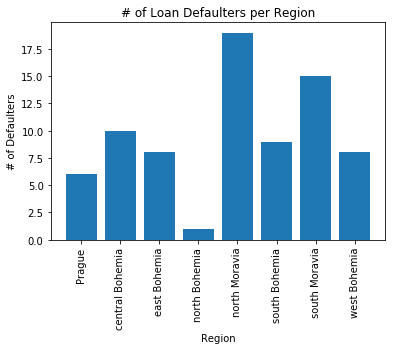

In [104]:
#Plotting a bargraph to view the loan defaulters per region
plt.bar(loan_default1.index,loan_default1.iloc[:,1])
plt.title('# of Loan Defaulters per Region')
plt.xlabel('Region')
plt.xticks(rotation='vertical')
plt.ylabel('# of Defaulters')
plt.show()

In [106]:
#Visualsing the high value customers
#Pivoting the table to find the total amount across regions
account_bal = basetable.pivot_table(index='Region',values='Balance_amount',aggfunc='sum')

In [107]:
#Checking the account balance
account_bal

,Balance_amount
Region,
Prague,28918669.0
central Bohemia,29271616.7
east Bohemia,29588809.7
north Bohemia,24656973.6
north Moravia,40064175.0
south Bohemia,18664847.0
south Moravia,40756698.9
west Bohemia,22072768.3


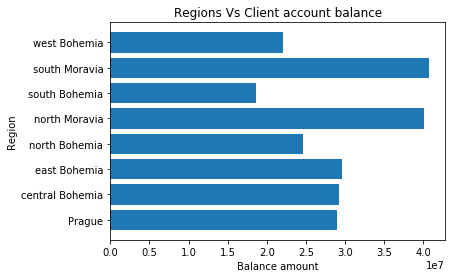

In [110]:
#Plotting the hist graph to view the region with high account balance
plt.barh(account_bal.index,account_bal.Balance_amount)
plt.title('Regions Vs Client account balance')
plt.xlabel('Balance amount')
plt.ylabel('Region')
plt.show()

In [159]:
#Visualising the Credits and withdrawal based on age
#Creating Age groups and mapping the same with basetable to find the age groups with different credit and withdrawal rates
basetable['age_group'] = basetable['age'] // 10 * 10
basetable.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,client_id,gender,age,Region,account_year,Owner_account,Disponent_account,Credit_amount,Withdrawal_amount,Balance_amount,...,Loan_Contract_running,Loan_client_debt,Years_creditcard,classic,gold,junior,Region_AvgUnemploymentRate_96,Region_AvgSalary,Region_AvgCrimeRate_96,age_group
0,1,F,29,south Bohemia,1995,1.0,0.0,1905.102941,1320.102190,13466.5,...,0.0,0.0,0.0,0.0,0.0,0.0,2.813750,8831.50,2271.625000,20
1,2,M,54,Prague,1993,1.0,0.0,10506.930921,4768.177301,42628.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.430000,12541.00,99107.000000,50
2,3,F,59,Prague,1993,0.0,1.0,10506.930921,4768.177301,42628.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.430000,12541.00,99107.000000,50
3,4,M,43,central Bohemia,1997,1.0,0.0,3762.152174,1717.785915,51096.1,...,0.0,0.0,0.0,0.0,0.0,0.0,2.878333,9357.25,3620.583333,40
4,5,F,39,central Bohemia,1997,0.0,1.0,3762.152174,1717.785915,51096.1,...,0.0,0.0,0.0,0.0,0.0,0.0,2.878333,9357.25,3620.583333,30


In [161]:
#Pivoting the basetable to find the aggregated credit amount based on the age groups
agecred = basetable.pivot_table(index='age_group',values='Credit_amount',aggfunc='mean')
agecred

,Credit_amount
age_group,
10,6293.280827
20,8231.075149
30,8974.829951
40,9044.272075
50,9063.973311
60,5825.772399
70,2858.687478
80,2816.544942


In [162]:
#Pivoting the basetable to find the aggregated withdrawal amount based on the age groups
agewith = basetable.pivot_table(index='age_group',values='Withdrawal_amount',aggfunc='mean')
agewith

,Withdrawal_amount
age_group,
10,4202.666724
20,5018.951695
30,5239.115924
40,5328.017685
50,5322.771992
60,3389.878494
70,1646.836293
80,1665.208766


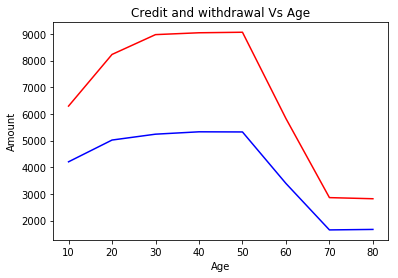

In [164]:
#plotting a line plot for the Credits and withdrawal based on age
plt.plot(agecred.index, agecred.iloc[:,0],color='red')
plt.plot(agewith.index, agewith.iloc[:,0],color='Blue')
plt.title('Credit and withdrawal Vs Age')  # Title
plt.xlabel('Age')  # X label
plt.ylabel('Amount')  # Y label
plt.show()

In [112]:
# Visualing the Frequency of male and female clients
gender = basetable.groupby('gender')['client_id'].count()

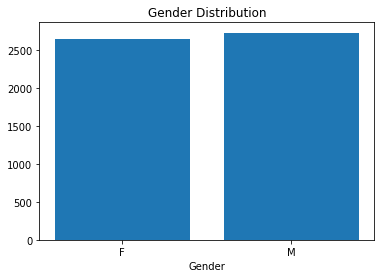

In [114]:
#Plotting the bargraph for gender distribution
plt.bar(gender.index,gender.iloc[0:])
plt.title('Gender Distribution')  # Title
plt.xlabel('Gender')  # X label
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

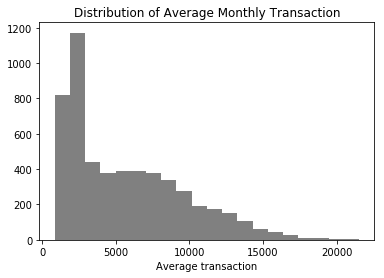

In [120]:
#Visualising the average monthly transactions across clients 
plt.hist(basetable['Avg_trans_permonth'],color ='grey',bins=20)
plt.title('Distribution of Average Monthly Transaction')  # Title
plt.xlabel('Average transaction')  # X label
plt.show

In [122]:
#Visualising the Relationship between remittance to other banks and collection from other banks
#Grouping the columns and find the total count for the collection from other bank across regions
otherbank = basetable.groupby('Region')['collect_otherbank'].sum()

In [123]:
#Viewing the data
otherbank

Region
Prague             31445.0
central Bohemia    32119.0
east Bohemia       28927.0
north Bohemia      28167.0
north Moravia      43231.0
south Bohemia      21067.0
south Moravia      45149.0
west Bohemia       24344.0
Name: collect_otherbank, dtype: float64

In [124]:
#Grouping the columns and find the total count for the remittance from other bank across regions
remitbank = basetable.groupby('Region')['remit_otherbank'].sum()
remitbank

Region
Prague             10061.0
central Bohemia    10898.0
east Bohemia        9324.0
north Bohemia       9209.0
north Moravia      14680.0
south Bohemia       6128.0
south Moravia      12905.0
west Bohemia        8396.0
Name: remit_otherbank, dtype: float64

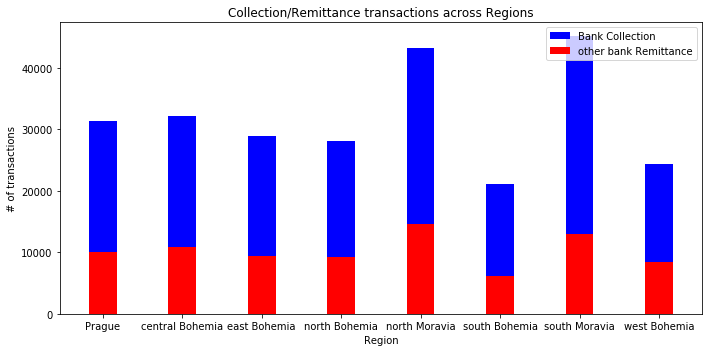

In [137]:
#Plotting the collection and remittance transactions across regions
fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)

bar_width = 0.35
ax = plt.bar(otherbank.index,otherbank.iloc[0:], width=bar_width, color='blue')
ax = plt.bar(remitbank.index,remitbank.iloc[0:], bar_width, color='red')

plt.title('Collection/Remittance transactions across Regions')
plt.xlabel('Region')
plt.ylabel('# of transactions')
plt.legend(labels=['Bank Collection', 'other bank Remittance'], loc='upper right')

fig.tight_layout()
plt.show()

In [138]:
#Visualing the Relation between insurance payment and Average crime rate
#Grouping the insurance payment across regions
insurance = basetable.groupby('Region')['insurance_payment'].sum()
insurance

Region
Prague             3173.0
central Bohemia    2889.0
east Bohemia       2092.0
north Bohemia      2752.0
north Moravia      3923.0
south Bohemia      1959.0
south Moravia      3853.0
west Bohemia       1588.0
Name: insurance_payment, dtype: float64

In [139]:
#Grouping the average crime rate across regions
Avgcrime = basetable.groupby('Region')['Region_AvgCrimeRate_96'].mean()
Avgcrime

Region
Prague             99107.000000
central Bohemia     3620.583333
east Bohemia        2786.000000
north Bohemia       4838.000000
north Moravia       6174.272727
south Bohemia       2271.625000
south Moravia       3845.785714
west Bohemia        2586.300000
Name: Region_AvgCrimeRate_96, dtype: float64

In [141]:
#Merging the columns insurance and average crimerate
insu_crime = pd.concat([insurance, Avgcrime], axis=1)

In [142]:
#Viewing the data after merging
insu_crime

,insurance_payment,Region_AvgCrimeRate_96
Region,,
Prague,3173.0,99107.000000
central Bohemia,2889.0,3620.583333
east Bohemia,2092.0,2786.000000
north Bohemia,2752.0,4838.000000
north Moravia,3923.0,6174.272727
south Bohemia,1959.0,2271.625000
south Moravia,3853.0,3845.785714
west Bohemia,1588.0,2586.300000


In [151]:
#Adding one more column for region other than index
insu_crime['reg'] = insu_crime.index


In [152]:
#Viewing the column
insu_crime

,insurance_payment,Region_AvgCrimeRate_96,reg
Region,,,
Prague,3173.0,99107.000000,Prague
central Bohemia,2889.0,3620.583333,central Bohemia
east Bohemia,2092.0,2786.000000,east Bohemia
north Bohemia,2752.0,4838.000000,north Bohemia
north Moravia,3923.0,6174.272727,north Moravia
south Bohemia,1959.0,2271.625000,south Bohemia
south Moravia,3853.0,3845.785714,south Moravia
west Bohemia,1588.0,2586.300000,west Bohemia


In [178]:
#defining the color for every region as dictionary
colors = {'Prague':'red', 'central Bohemia':'blue', 'east Bohemia':'green', 'north Bohemia':'black','north Moravia':'pink',
        'south Bohemia':'grey' ,'south Moravia' : 'orange','west Bohemia':'yellow'}

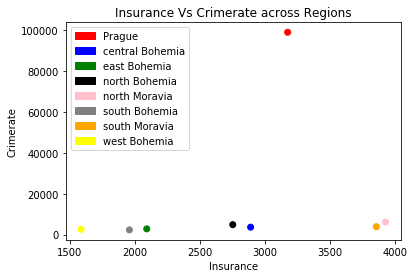

In [197]:
#Plotting a scatter plot to view the relation between insurance and crime rate across regions
plt.scatter(insu_crime['insurance_payment'],insu_crime['Region_AvgCrimeRate_96'],
            c = insu_crime['reg'].apply(lambda x: colors[x]))
plt.title('Insurance Vs Crimerate across Regions')
plt.xlabel('Insurance')
plt.ylabel('Crimerate')
#Looping to define the legend
patchList = []
for key in colors:
        data_key = mpatches.Patch(color=colors[key], label=key)
        patchList.append(data_key)
plt.legend(handles=patchList)
plt.show()
